In [1]:
%matplotlib notebook
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
base_dir = '/home/david/git/LadderVAE/out'

In [4]:
!dir out/

20190906-232419  20190907-142413  20190908-130427  20190910-205137
20190907-095555  20190907-155254  20190909-100208
20190907-115748  20190907-222755  20190909-155058
20190907-141501  20190908-043304  20190909-215838


In [33]:
def load(base_dir, dir_names):
    stats = dict()
    for d in dir_names:
        filename = os.path.join(base_dir, d, 'stat.h5')
        stat = utils.Stat(filename).load()
        stats[d] = stat
    return stats

def filt(x, filter_length=100):
    y = np.convolve(x.flatten(), np.ones((filter_length,))/filter_length, mode='same')
    return y

def plot_field(res, field, filter_length=None):
    plt.figure(figsize=(10, 8), dpi= 80)
    for r in res:
        y = res[r].current[field]
        if filter_length:
            y = filt(y, filter_length=filter_length)
        plt.plot(y)
    _ = plt.legend(res.keys())
    
def load_params(base_dir, dir_names):
    params = dict()
    for d in dir_names:
        filename = os.path.join(base_dir, d, 'parameters.h5')
        with h5py.File(filename, 'r') as f:
            pd = dict()
            for k in f:
                pd[k] = f[k].value
            params[d] = pd
    return params

def get_param_legend(params, format_str, fields):
    pl = []
    for p in params.values():
        lst = [ p[f] for f in fields ]
        ls = format_str % tuple(lst)
        pl += [ ls ]
    return pl

In [38]:
dirs = ['20190907-155254', '20190907-222755', '20190908-043304', '20190908-130427', 
        '20190909-100208', '20190909-155058', '20190909-215838', '20190910-205137']
res = load(base_dir, dirs)
params = load_params(base_dir, dirs)
legend = get_param_legend(params, '%s  %s', ['model_type', 'nrof_stochastic_units'])

<IPython.core.display.Javascript object>


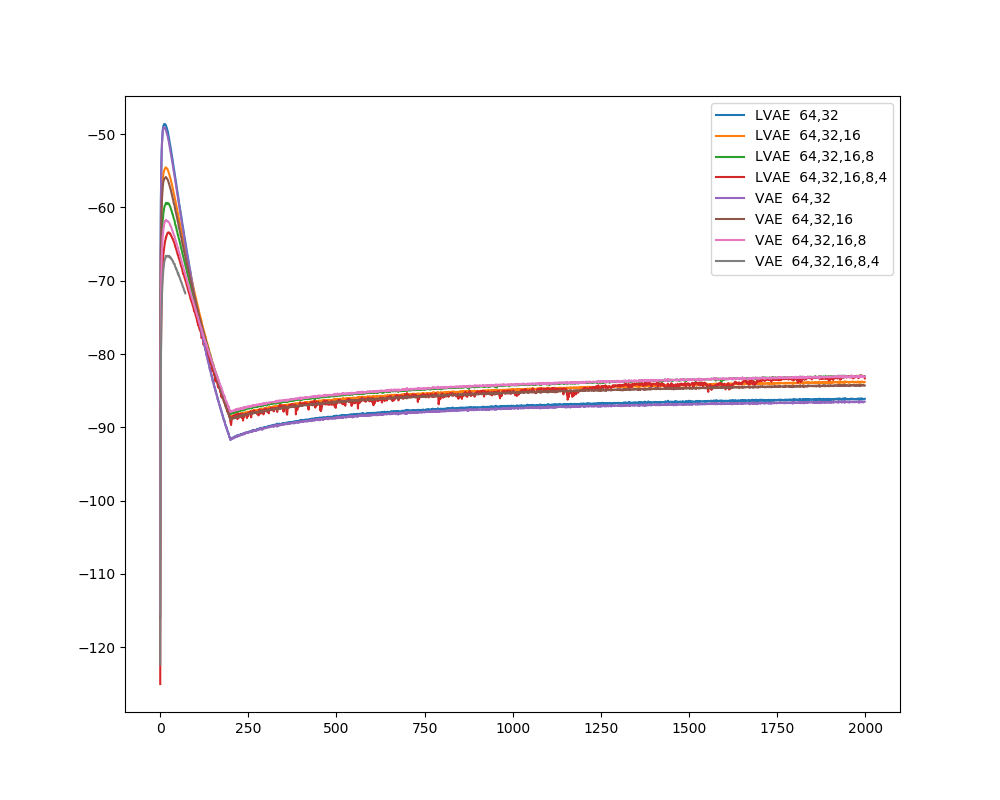

In [34]:
plot_field(res, 'train_elbo')
#plt.ylim([-95, -80])
plt.legend(legend)

<IPython.core.display.Javascript object>


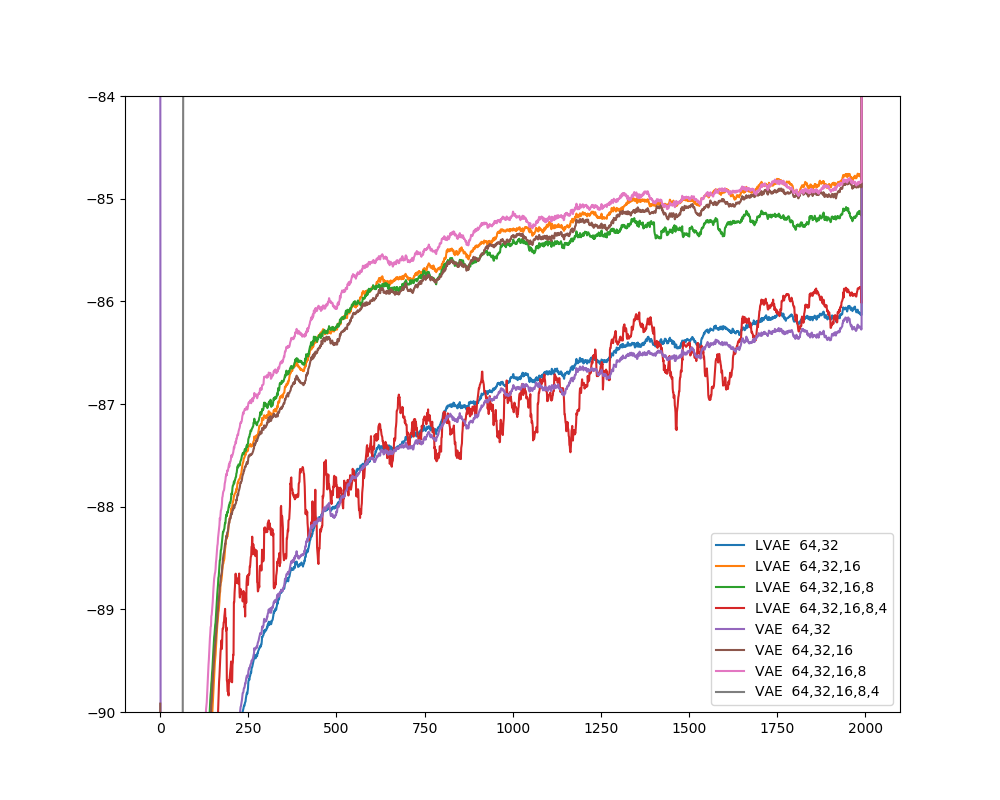

In [37]:
plot_field(res, 'eval_elbo', filter_length=20)
plt.ylim([-90, -84])
plt.legend(legend)

In [ ]:
import re

#str = '*Epoch=4999	Time=33.09	LR=0.00200	E_qsamples=1	IVAEsamples=1	temp: 1.00	TRAIN:	Cost=-85.84437	logp(x|z1)=-61.05516	log p(z): -81.585|-45.422	log q(z): -70.604|-31.614'
epoch, t, elbo, log_px, log_pz_0, log_pz_1, log_qz_0, log_qz_1 = [], [], [], [], [], [], [], []
with open('../LVAE/outfolder_20190811/trainlogfile.log') as f: 
    for mystr in f.readlines():
        lx = re.split('=| |\t|\|', mystr)
        epoch += [int(lx[1])]
        t += [float(lx[3])]
        elbo += [float(lx[14])]
        log_px += [float(lx[17])]
        log_pz_0 += [float(lx[20])]
        log_pz_1 += [float(lx[21])]
        log_qz_0 += [float(lx[20])]
        log_qz_1 += [float(lx[21])]
epoch = np.array(epoch)
elbo = np.array(elbo)
log_px = np.array(log_px)
log_pz_0 = np.array(log_pz_0)
log_pz_1 = np.array(log_pz_1)
log_qz_0 = np.array(log_qz_0)
log_qz_1 = np.array(log_qz_1)
